<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
pip install tensorflow

  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2

    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\win\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
# Check keras and tensorflow versions

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.2.4-tf
Tensorflow version:  2.1.0


In [8]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [9]:
# The diabetes dataset
diabetes = load_diabetes()

In [10]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Prepare input data

In [11]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [12]:
# How many observations are in y?
len(y)

442

### Split the data (training/test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [14]:
# Set up the model architecture
model = Sequential()

In [15]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [17]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [18]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [19]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

Wall time: 53.8 s


### Create predictions

In [20]:
predictions = model.predict(X_test)

### Evaluate the model

In [21]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

133/133 [==============================] - 0s 75us/sample - loss: 3276.9290 - mse: 3276.9290

Test loss: 3276.929006


In [22]:
score

[3276.9290064761512, 3276.929]

In [23]:
# Find RMSE
score[0] ** (1/2)

57.2444670381003

In [24]:
y.mean()

152.13348416289594

In [25]:
y.std()

77.00574586945044

In [26]:
y.min()

25.0

In [27]:
y.max()

346.0

### Visualisation of cost

In [28]:
history.history

{'loss': [28727.83648708063,
  28686.217752299784,
  28628.882646568927,
  28548.90565814394,
  28433.038210650026,
  28280.611323897458,
  28083.515610203598,
  27828.469335514746,
  27509.17724397998,
  27116.376221760012,
  26641.711326433982,
  26075.580984933036,
  25436.59367390422,
  24707.687339353353,
  23895.373943114177,
  22978.7401075487,
  21978.02398602374,
  20928.853972199675,
  19829.34169118642,
  18659.778267930596,
  17461.941850142044,
  16198.69186916599,
  14949.109163622836,
  13708.56342583198,
  12501.808690983496,
  11365.001868574134,
  10305.789573900627,
  9349.314319957386,
  8505.858684853558,
  7730.661535485999,
  7009.682476951963,
  6462.206604532349,
  6004.805530515068,
  5606.1393609645565,
  5296.070560802113,
  5044.682145816423,
  4832.970525039739,
  4668.9227762593855,
  4536.348035572927,
  4440.619649515524,
  4363.843443503111,
  4305.94962353727,
  4234.851169338474,
  4190.277181253805,
  4153.435255603873,
  4117.5831496994215,
  4088.

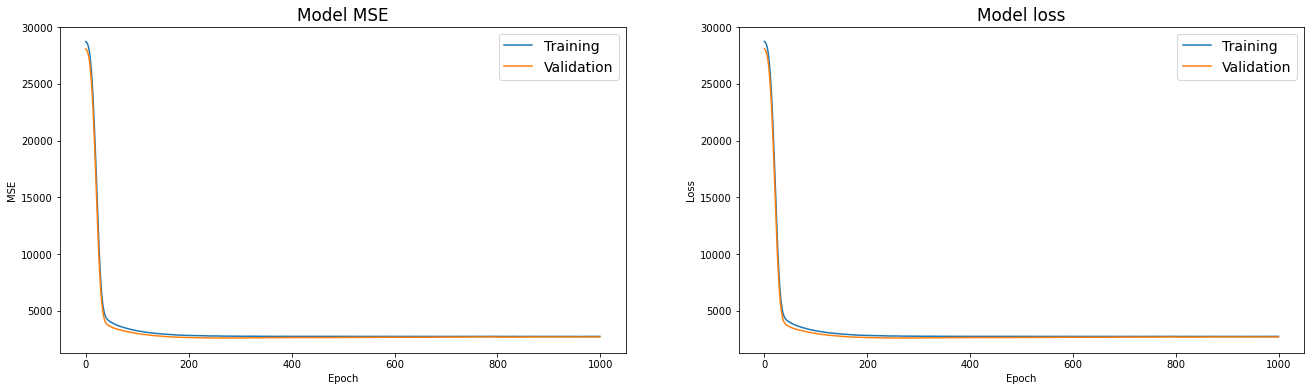

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [30]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

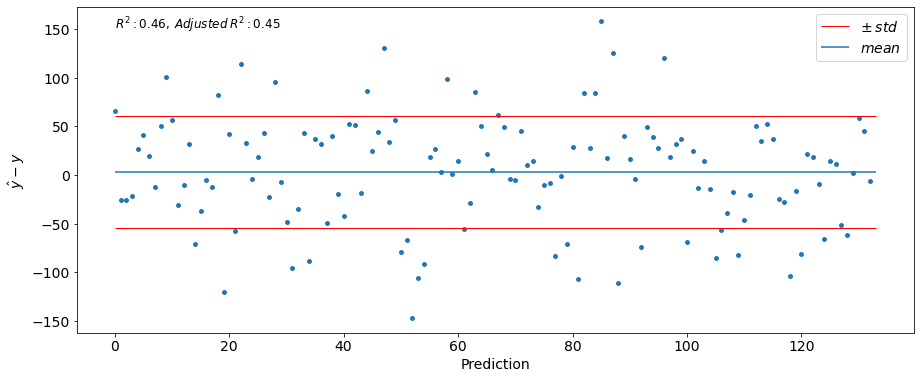

In [31]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



